## **Task "Do you know how to make Query String?" (7kyu)**

### Request:

Query string is a way to serialize object, which is used in HTTP requests. You may see it in URL:
codewars.com/kata/search/?q=querystring
The part q=querystring represents that parameter q has value querystring. Also sometimes querystring used in HTTP POST body:
POST /api/users
Content-Type: application/x-www-form-urlencoded

username=warrior&kyu=1&age=28
The string username=warrior&kyu=1&age=28 represents an entity (user in this example) with username equals warrior, kyu equals 1 and age equals 28. The entity may be represented as object:
{
  "username": "warrior",
  "kyu": 1,
  "age": 28
}
Sometimes there are more than one value for property:
{
  "name": "shirt",
  "colors": [ "white", "black" ]
}
Then it represents as repeated param:
name=shirt&colors=white&colors=black
So, your task is to write a function that convert an object to query string:
to_query_string({ "bar": [ 2, 3 ], "foo": 1 }) // => "bar=2&bar=3&foo=1"
Next you may enjoy kata Objectify a URL Query String.
Note: urllib.parse.urlencode has been deactivated.

with python

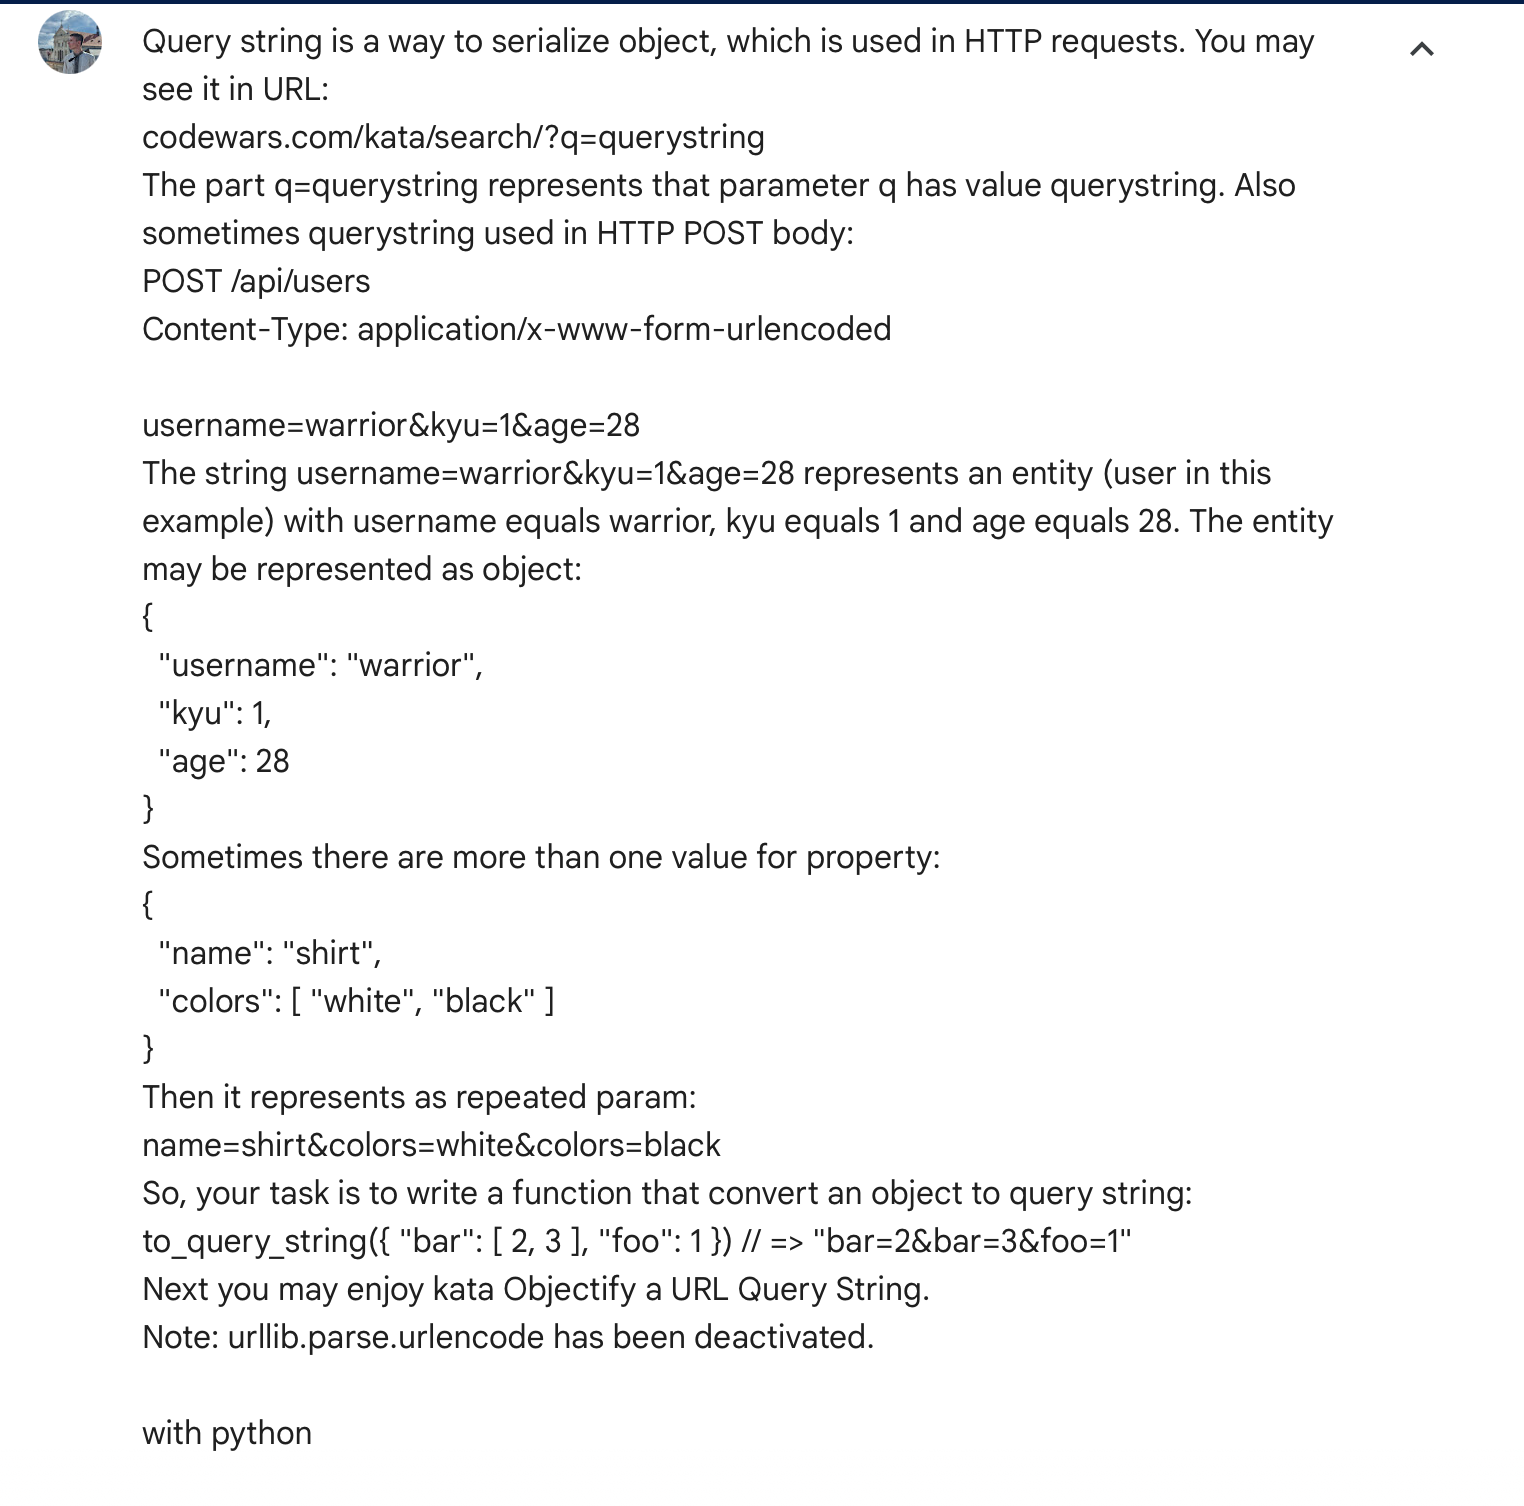
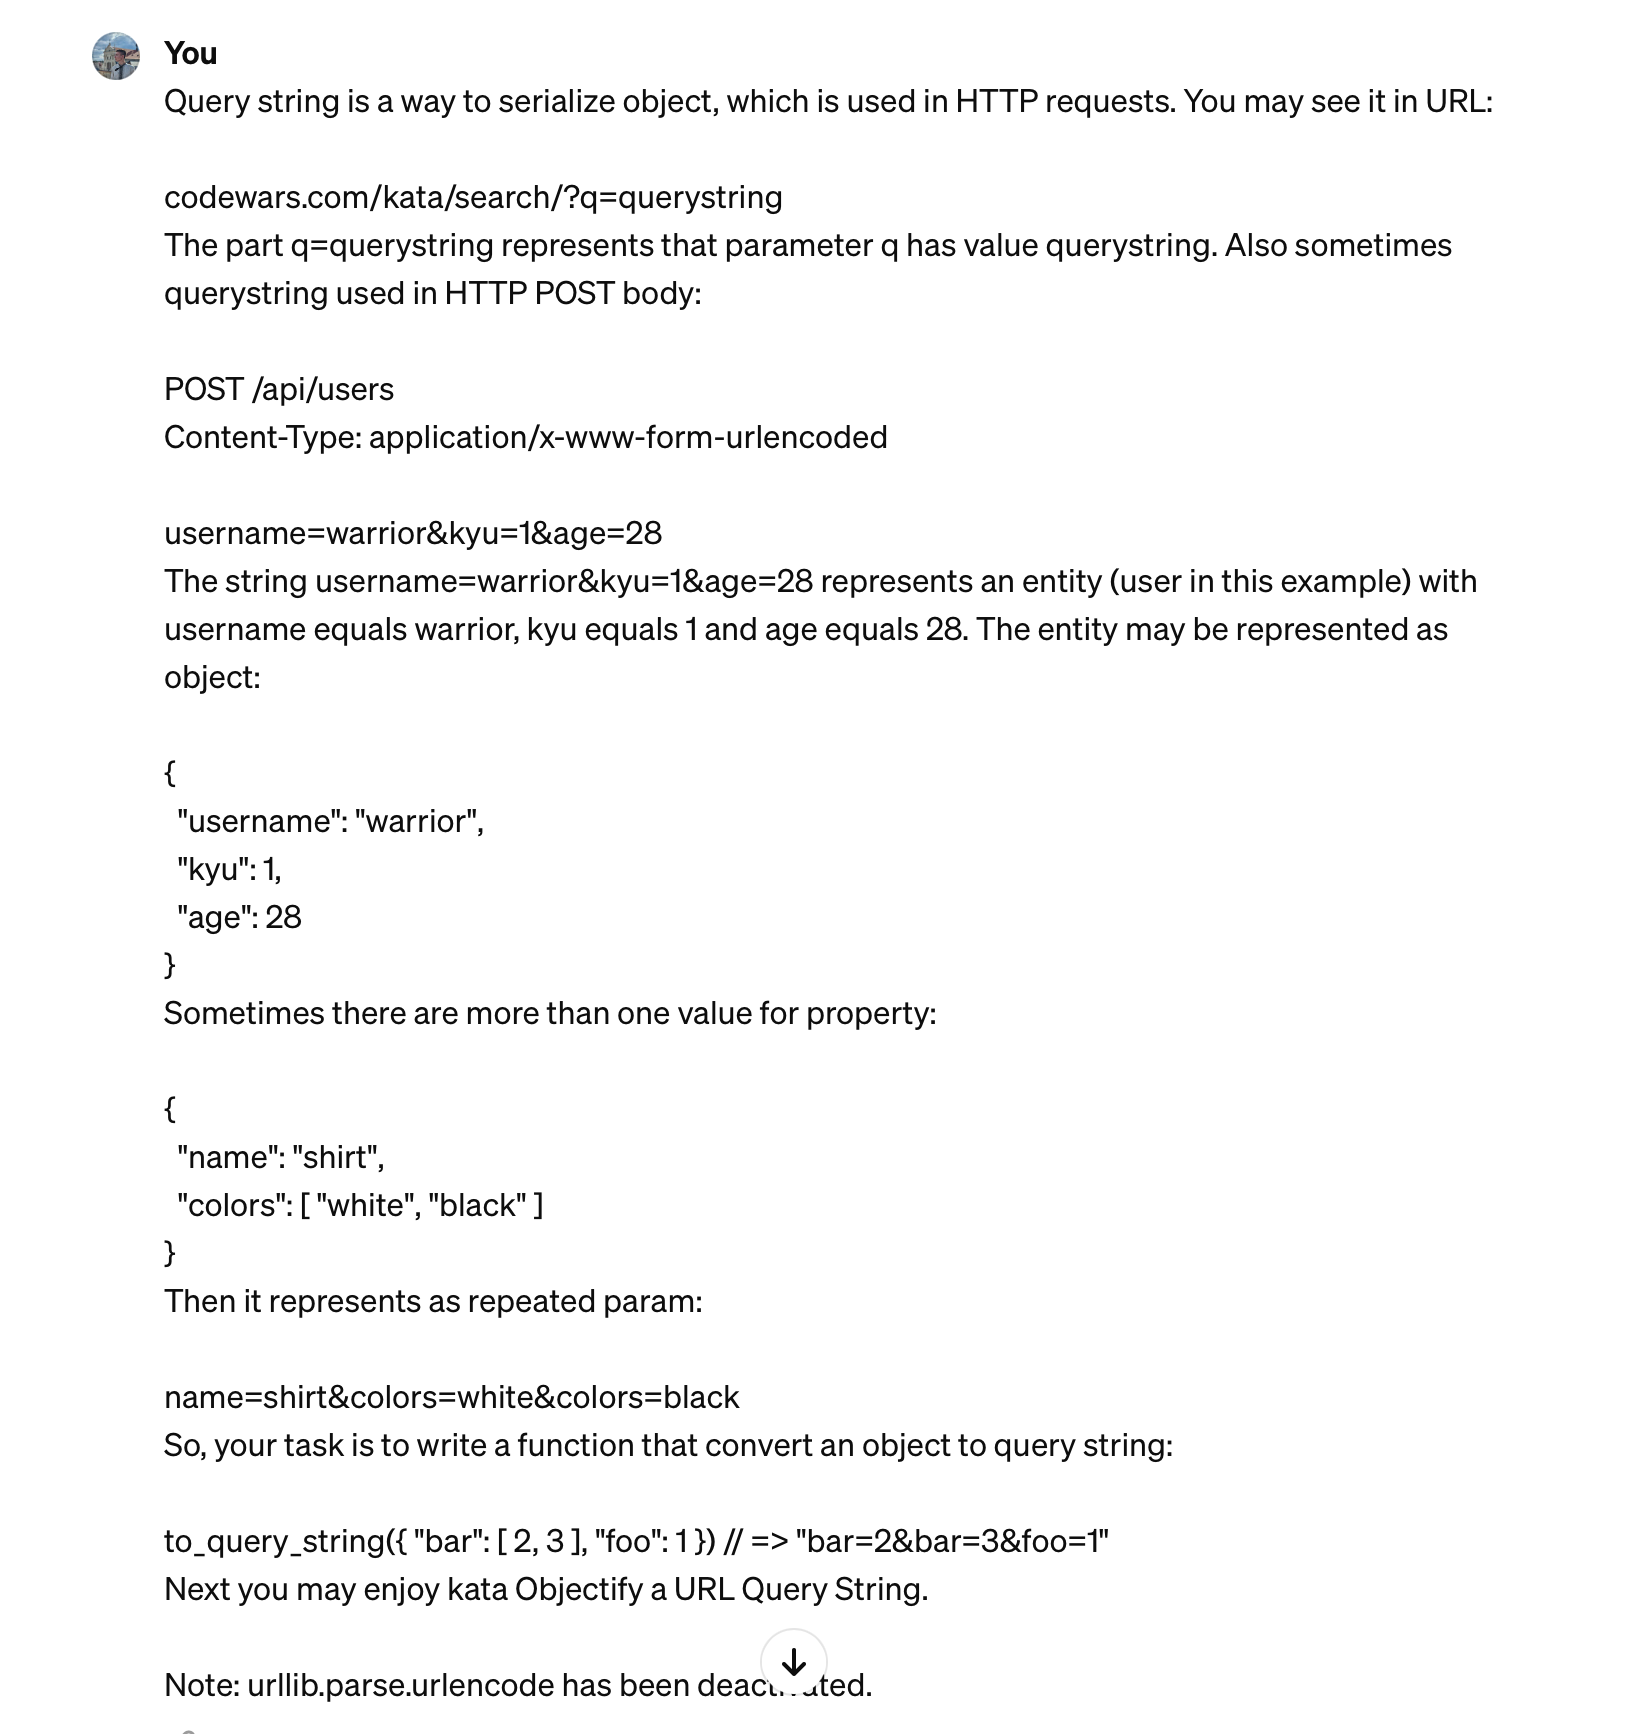

### Wrong answers

In [ ]:
def to_query_string(obj):
    """Converts an object to a query string representation.

    Args:
        obj (dict): The object to be converted.

    Returns:
        str: The query string representation of the object.

    Raises:
        TypeError: If the object contains unsupported data types.
        ValueError: If a list element is not a string.
    """

    parts = []
    for key, value in obj.items():
        if isinstance(value, list):
            for item in value:
                if not isinstance(item, str):
                    raise ValueError(f"List elements must be strings, got: {item}")
                parts.append(f"{key}={item}")
        else:
            if not isinstance(value, (str, int, float)):
                raise TypeError(f"Unsupported data type for value: {value}")
            parts.append(f"{key}={value}")

    return '&'.join(parts)

**Request for wrong answer:**

Traceback (most recent call last):
  File "/workspace/default/.venv/lib/python3.11/site-packages/codewars_test/test_framework.py", line 112, in wrapper
    func()
  File "/workspace/default/tests.py", line 15, in _
    to_query_string({ "bar": [2, 4], "foo": [1, 3] }),
    ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/workspace/default/solution.py", line 21, in to_query_string
    raise ValueError(f"List elements must be strings, got: {item}")
ValueError: List elements must be strings, got: 2

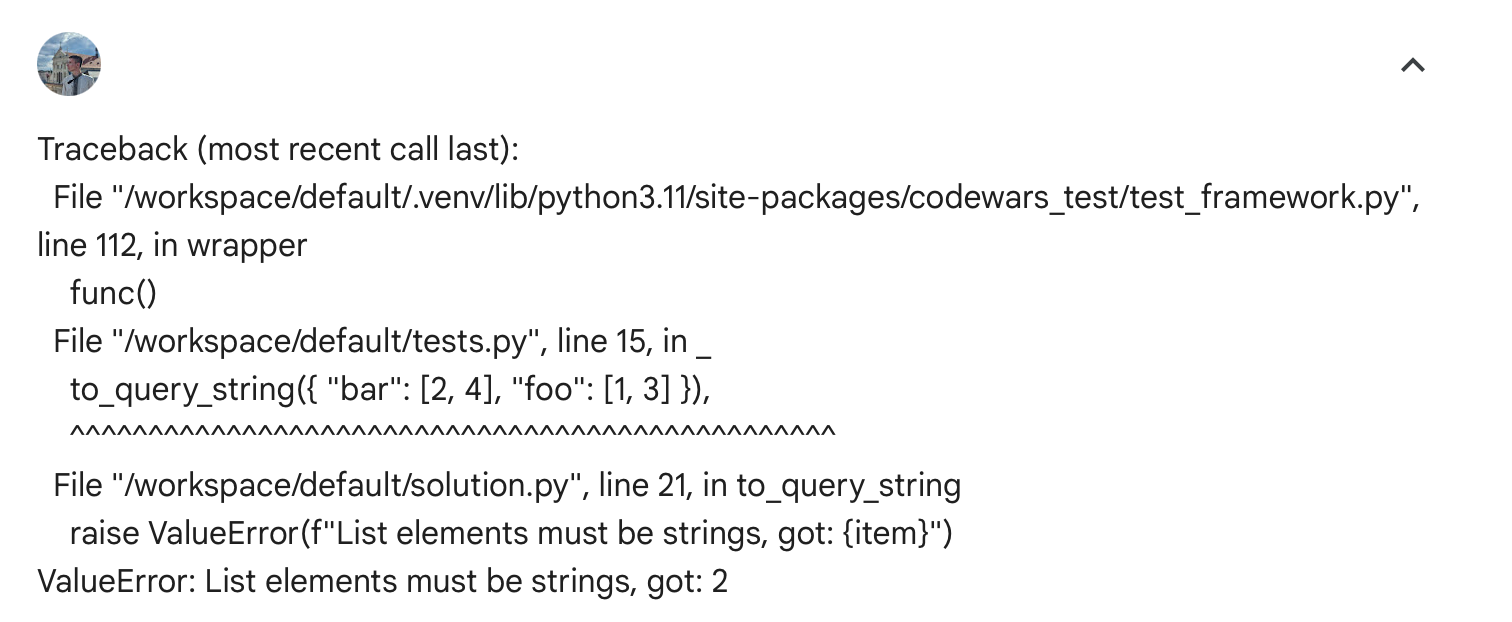

### Code answer:

In [ ]:
def to_query_string(obj):
    def flatten(key, value):
        if isinstance(value, list):
            return [(key, v) for v in value]
        else:
            return [(key, value)]

    query_params = []
    for key, value in obj.items():
        query_params.extend(flatten(key, value))

    return '&'.join([f"{key}={value}" for key, value in query_params])


### On CodeWars:

All tests were passed

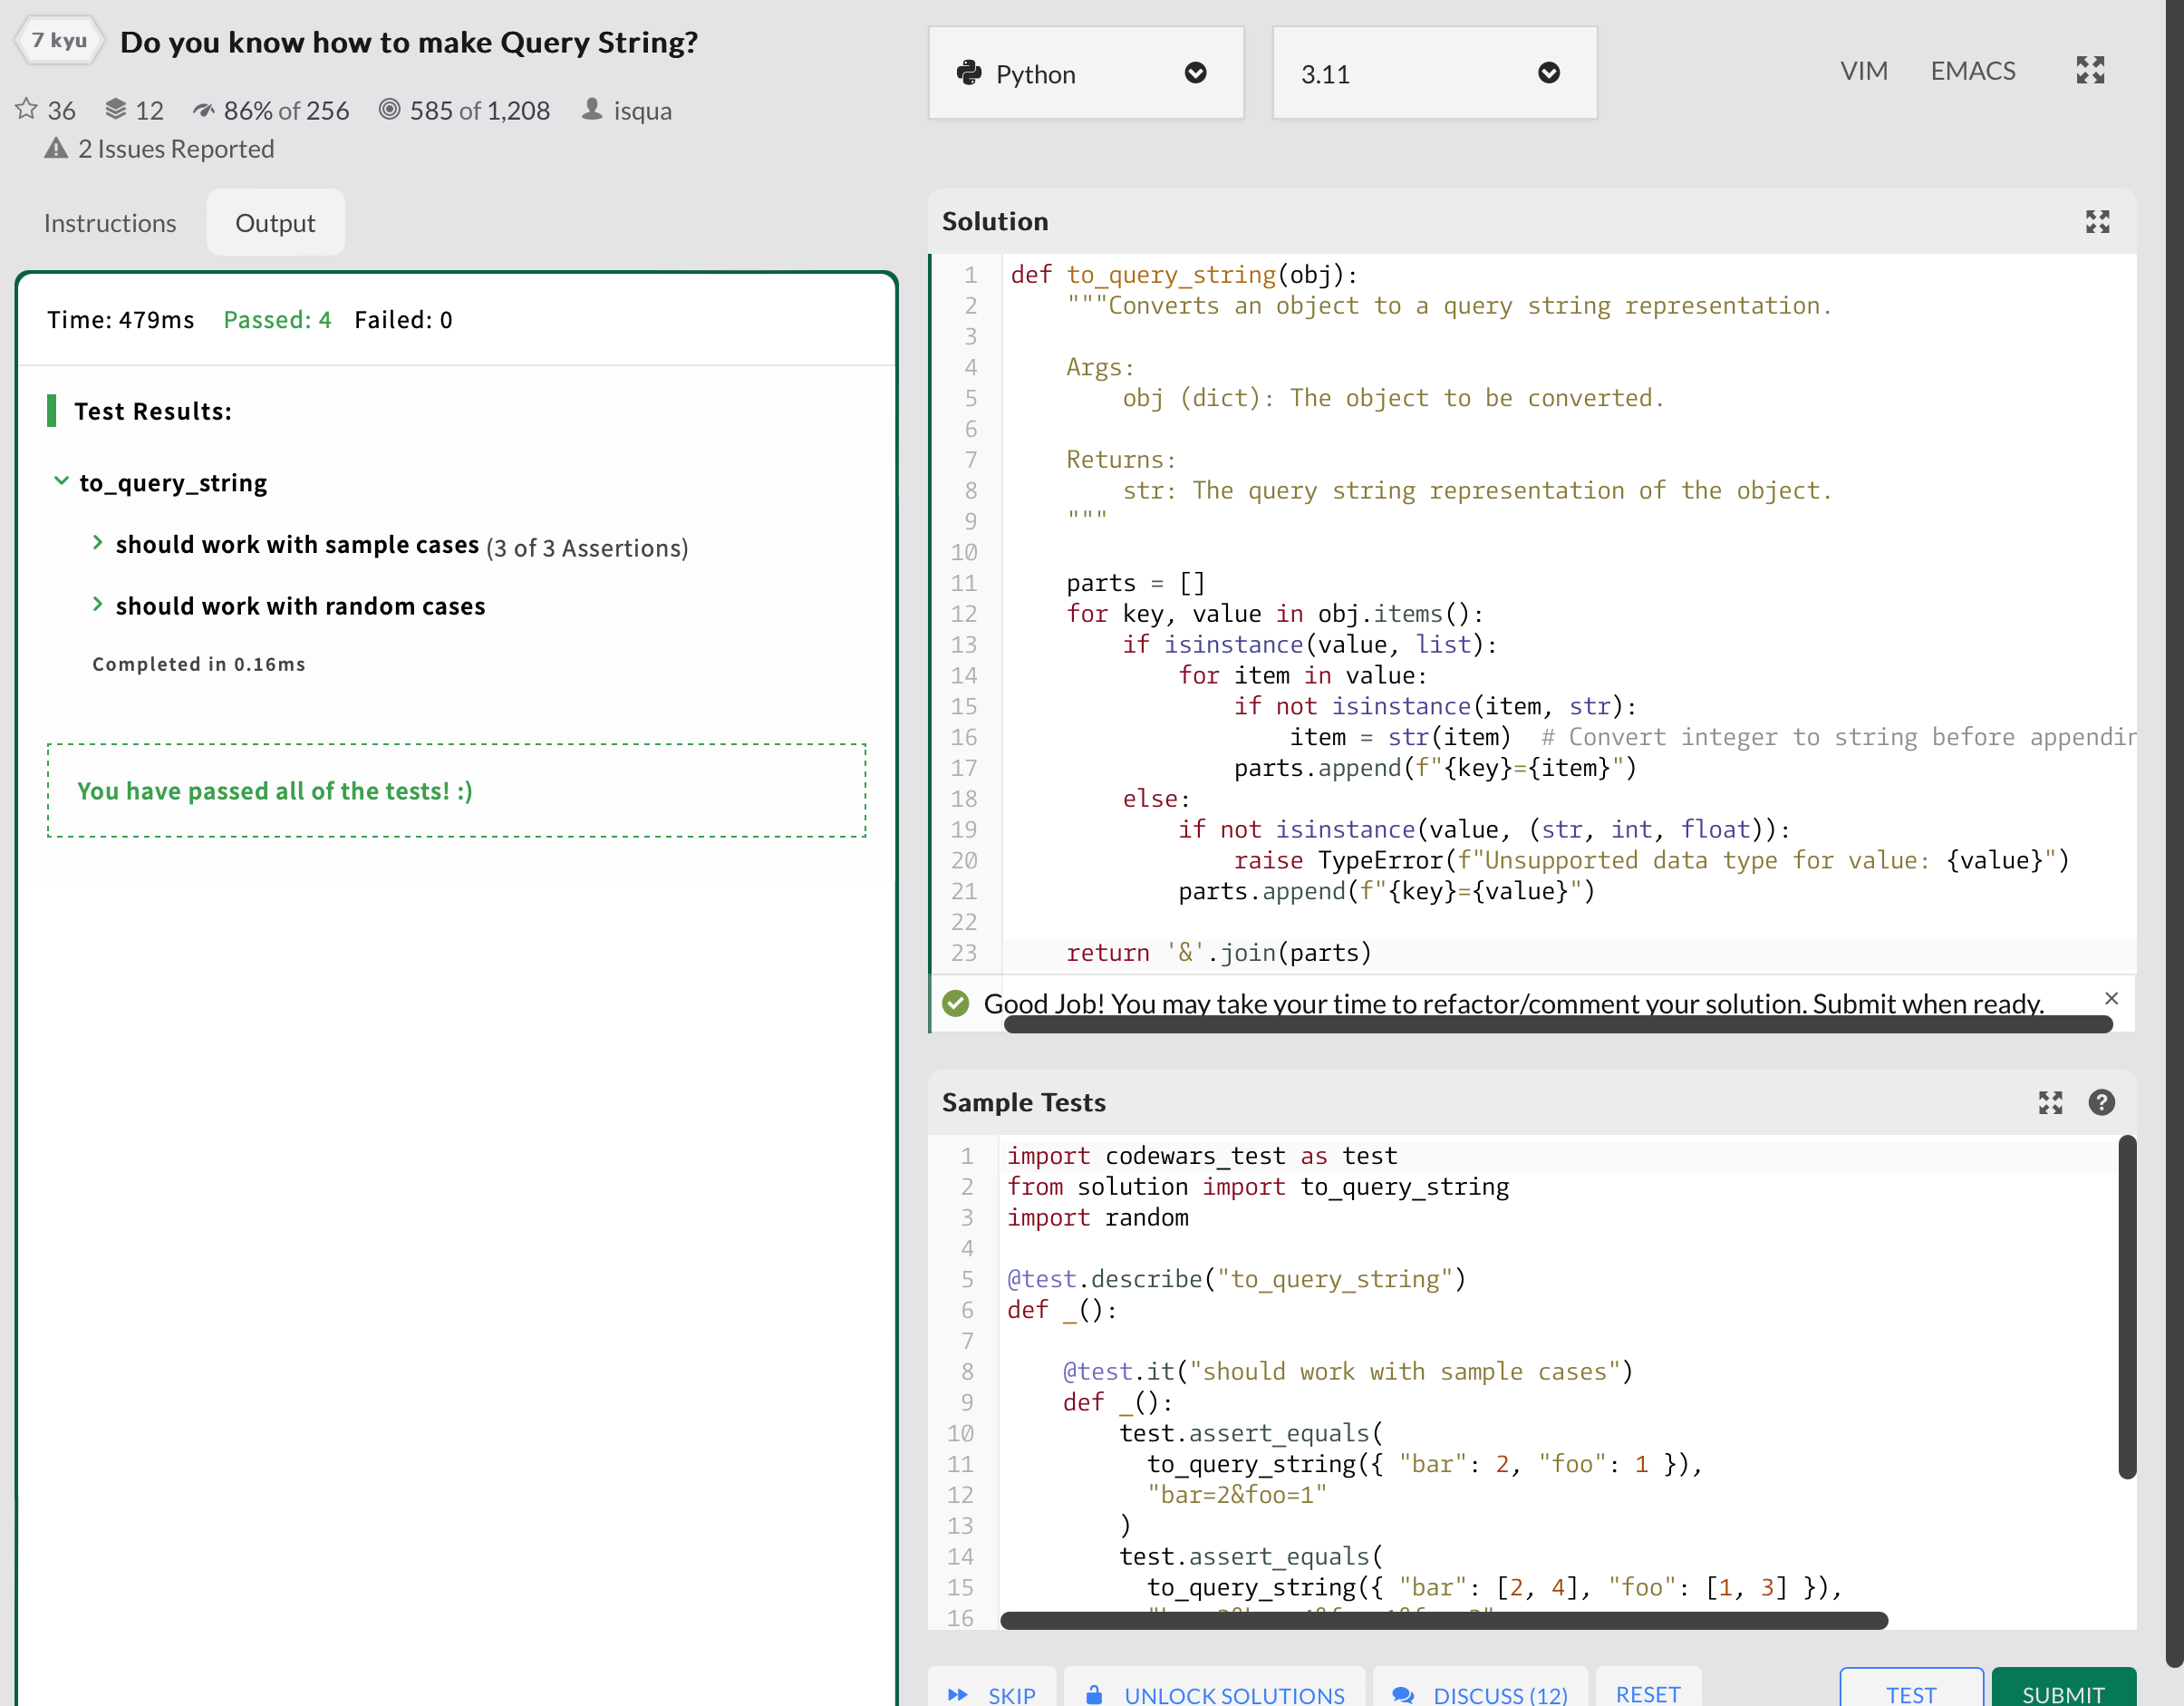
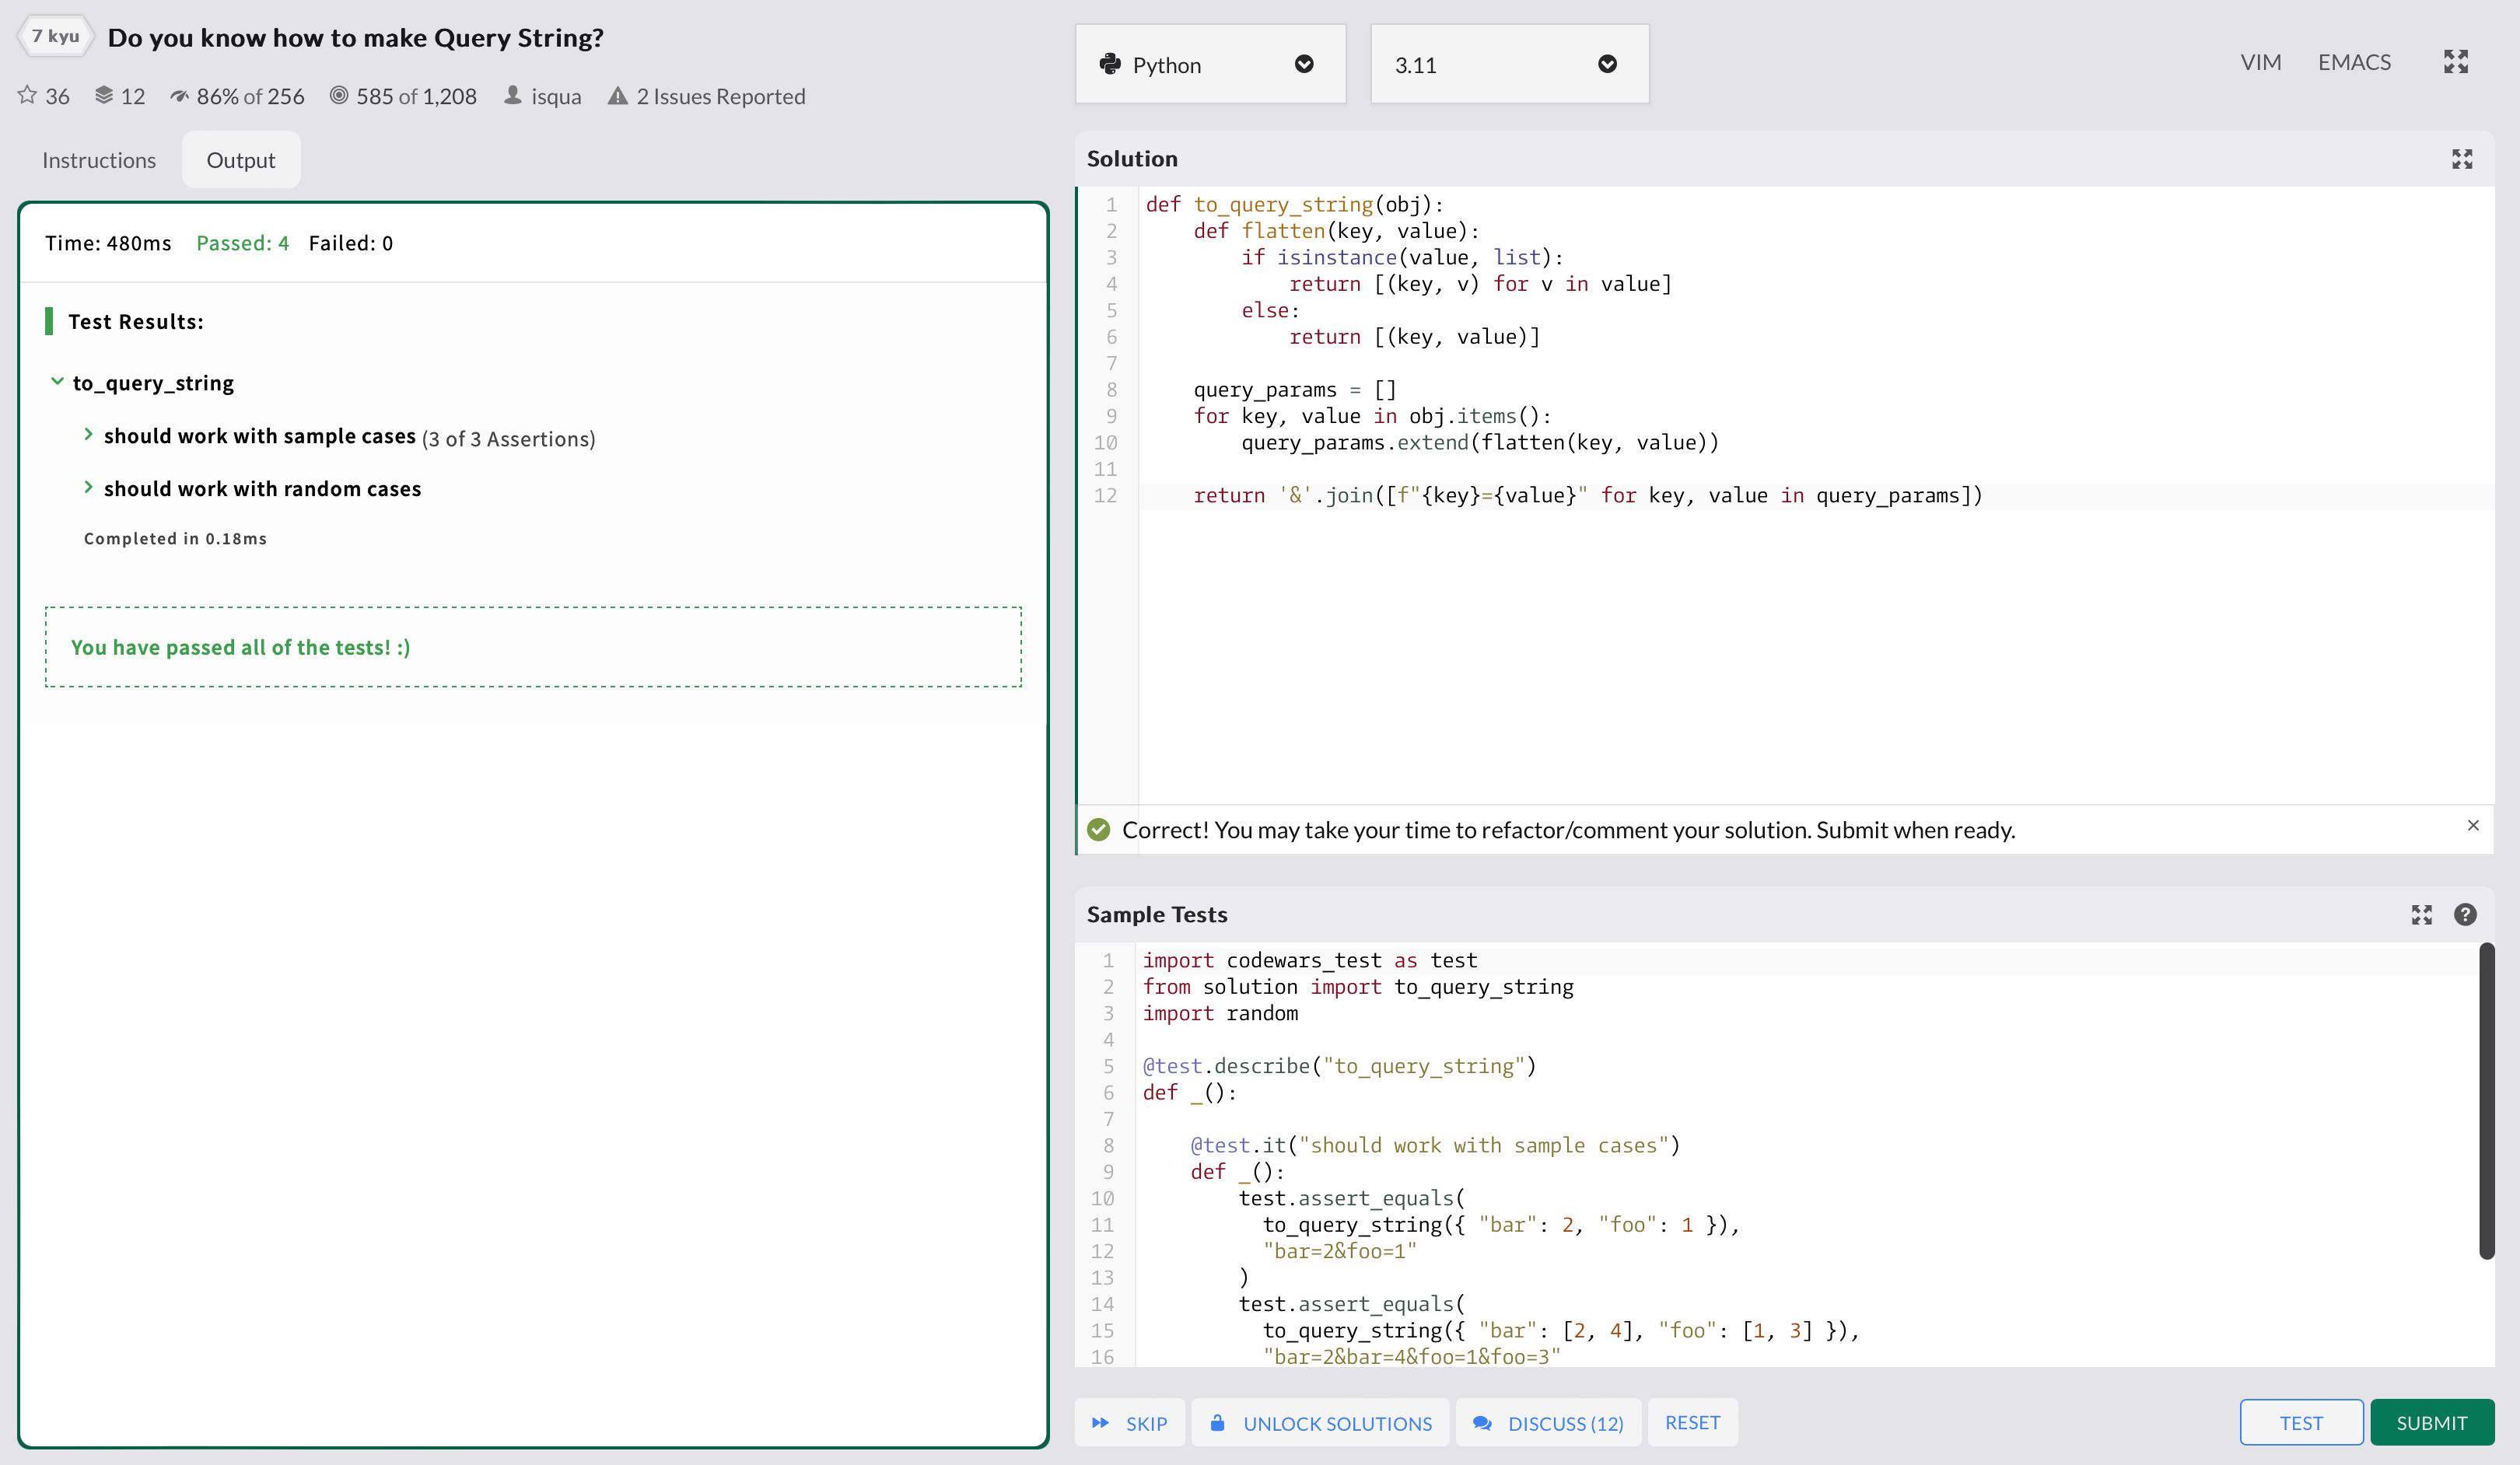